In [2]:
import pandas as pd

### Read the file defining all instances considered on road networks. The file is needed to recognize unsolved instances later.

In [4]:
instancesHeader = ['GRAPH', 'SOURCE', 'TARGET', 'K']

instancesDf = pd.read_csv('roadInstances.csv', delimiter=' ', header=None, names=instancesHeader)
instancesDf

,GRAPH,SOURCE,TARGET,K
0,USA-road-dt.BAY.gr,16543,55889,10
1,USA-road-dt.BAY.gr,283434,63730,10
2,USA-road-dt.BAY.gr,121364,296103,10
3,USA-road-dt.BAY.gr,95977,317967,10
4,USA-road-dt.BAY.gr,111879,174884,10
...,...,...,...,...
19795,USA-road-dt.W.gr,5403904,1040213,1000000
19796,USA-road-dt.W.gr,2995822,4018166,1000000
19797,USA-road-dt.W.gr,513901,3174123,1000000
19798,USA-road-dt.W.gr,2071445,835264,1000000


### For our new algorithm, give a name to the columns in the corresponding results file. Then, read the file.

In [5]:
newAlgoHeader = ['ALGO', 'GRAPH', 'SOURCE', 'TARGET', 'K', 'TIME', 'COST_MIN', 'COST_MAX', 'SOLUTIONS', 'BDA_QUERIES', 'FAILED_BDA', 'EXPANSIONS_PER_BDA', 'EXPANSIONS_PER_FAILED_BDA', 'POOL_SIZE']

newAlgoDf = pd.read_csv('finalRoadResults_na.csv', delimiter=';', header=None, names=newAlgoHeader)

### For the KM algorithm, give a name to the columns in the corresponding results file. Then, read the file.

In [6]:
kurzHeader = ['ALGO', 'OPTIMISTIC', 'DUMMY', 'PRUNING', 'NODES', 'ARCS', 'SOURCE' , 'TARGET', 'K', 'SOLUTIONS', 'COST_MIN', 'COST_MAX', 'SUM_OF_COSTS', 'SP_TREES', 'SP_TREES_EXPANSIONS', 'TIME']

kurzDf = pd.read_csv('finalRoadResults_kurz.csv', delimiter=';', header=None, names=kurzHeader)

### Merge the new algorithm's results and the KM algorithm's results with the instance file. 
This gives us a big results table containing NaNs whenever one or both algorithm's did not solve an instance. If an instance was not solved by any of the algorithms, we discard it.

In [10]:
mergedDf = pd.merge(instancesDf, newAlgoDf, on=['GRAPH', 'SOURCE', 'TARGET', 'K'], how='left')
mergedDf = pd.merge(mergedDf, kurzDf, on=['SOURCE', 'TARGET', 'K'], how='left', suffixes=("_na", "_kurz"))
#Discard instances that are not solved by any algorithm.
mergedDf = mergedDf.loc[mergedDf['TIME_kurz'].notna() | mergedDf['TIME_na'].notna()]
mergedDf

,GRAPH,SOURCE,TARGET,K,ALGO_na,TIME_na,COST_MIN_na,COST_MAX_na,SOLUTIONS_na,BDA_QUERIES,...,PRUNING,NODES,ARCS,SOLUTIONS_kurz,COST_MIN_kurz,COST_MAX_kurz,SUM_OF_COSTS,SP_TREES,SP_TREES_EXPANSIONS,TIME_kurz
0,USA-road-dt.BAY.gr,16543,55889,10,NaN,0.122,223575.0,224097.0,10.0,17.0,...,distance-pruning,321270.0,800172.0,10.0,223575.0,224097.0,2.238986e+06,8.0,56523.0,0.023
1,USA-road-dt.BAY.gr,283434,63730,10,NaN,0.128,1437008.0,1437008.0,10.0,9.0,...,distance-pruning,321270.0,800172.0,10.0,1437008.0,1437008.0,1.437008e+07,1.0,310073.0,0.122
2,USA-road-dt.BAY.gr,121364,296103,10,NaN,0.115,1368332.0,1368420.0,10.0,17.0,...,distance-pruning,321270.0,800172.0,10.0,1368332.0,1368420.0,1.368380e+07,1.0,227830.0,0.082
3,USA-road-dt.BAY.gr,95977,317967,10,NaN,0.113,1336800.0,1336828.0,10.0,15.0,...,distance-pruning,321270.0,800172.0,10.0,1336800.0,1336828.0,1.336809e+07,1.0,190407.0,0.046
4,USA-road-dt.BAY.gr,111879,174884,10,NaN,0.092,1092027.0,1092030.0,10.0,15.0,...,distance-pruning,321270.0,800172.0,10.0,1092027.0,1092030.0,1.092028e+07,1.0,167453.0,0.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16195,USA-road-dt.NY.gr,55756,57664,1000000,NaN,96.978,646737.0,647783.0,1000000.0,1989311.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16196,USA-road-dt.NY.gr,201045,125079,1000000,NaN,77.551,558213.0,558671.0,1000000.0,1990851.0,...,distance-pruning,264346.0,733846.0,1000000.0,558213.0,558671.0,5.586053e+11,26045.0,29182754.0,304.203
16197,USA-road-dt.NY.gr,56931,252603,1000000,NaN,159.541,954328.0,954444.0,1000000.0,1983351.0,...,distance-pruning,264346.0,733846.0,1000000.0,954328.0,954444.0,9.544224e+11,1.0,256576.0,1278.820
16198,USA-road-dt.NY.gr,177073,104477,1000000,NaN,80.508,640491.0,641032.0,1000000.0,1995831.0,...,distance-pruning,264346.0,733846.0,1000000.0,640491.0,641032.0,6.409680e+11,28685.0,36586255.0,307.902


### Generate LaTeX table using geometric means and setting unsolved instances to the time limit T=7200s.

In [9]:
from scipy.stats import gmean
mergedDf.loc[mergedDf['TIME_kurz'].isna(), 'TIME_kurz'] = 7200
mergedDf.loc[mergedDf['TIME_na'].isna(), 'TIME_na'] = 7200
mergedDf['SPEEDUP'] = mergedDf['TIME_kurz']/mergedDf['TIME_na']
#mergedDf = mergedDf.loc[(mergedDf['TIME_kurz'] < mergedDf['TIME_na']) & (mergedDf['K'] > 100)]
#testDf = mergedDf[mergedDf['TIME_kurz'] >= mergedDf['TIME_na']]
print("K       & KM SOLVED  & KM DIJKSTRAS & KM TIME & NA SOLVED & BDA SSP & BDA SSP Fail & Iterations Success & Iterations Fail & NA Time & SPEEDUP\\\\")
for graphName, graphDf in mergedDf.groupby(by='GRAPH'):
    print("\midrule\n")
    print(graphName.split('.')[-2])
    print("\midrule\n")
    for pathsCount, pathsCountDf in graphDf.groupby(by='K'):
        averageSpeedup = gmean(pathsCountDf[pathsCountDf['SPEEDUP'].notna()]['SPEEDUP'])
        dijkstraPolls = gmean(pathsCountDf[pathsCountDf['SOLUTIONS_kurz'].notna()]['SP_TREES'])
        #print(len(pathsCountDf[pathsCountDf['TIME_na'].notna()]))
        lenNa = len(pathsCountDf[pathsCountDf['SOLUTIONS_na'].notna()])
        lenKurz = len(pathsCountDf[pathsCountDf['SOLUTIONS_kurz'].notna()])
        timeKurz = gmean(pathsCountDf[pathsCountDf['TIME_kurz'].notna()]['TIME_kurz'])
        timeNa = gmean(pathsCountDf[pathsCountDf['TIME_na'].notna()]['TIME_na'])
        bdaQueries = gmean(pathsCountDf[pathsCountDf['SOLUTIONS_na'].notna()]['BDA_QUERIES'])
        failedBdaQueries = gmean(pathsCountDf.loc[(pathsCountDf['SOLUTIONS_na'].notna()) & (pathsCountDf['FAILED_BDA']>0), 'FAILED_BDA'])
        expansionsPerSuccess = gmean(pathsCountDf[pathsCountDf['SOLUTIONS_na'].notna()]['EXPANSIONS_PER_BDA'])
        expansionsPerFail = gmean(pathsCountDf.loc[(pathsCountDf['SOLUTIONS_na'].notna()) & (pathsCountDf['FAILED_BDA']>0), 'EXPANSIONS_PER_FAILED_BDA'])
        print(f'{pathsCount:7d} &{lenKurz:10d} &{dijkstraPolls:10.0f} &{timeKurz:10.2f} &{lenNa:10} &{bdaQueries:10.0f} &{failedBdaQueries:10.0f} &{expansionsPerSuccess:20.0f} &{expansionsPerFail:20.0f} &{timeNa:10.2f} &{averageSpeedup:8.2f}\\\\')

K       & KM SOLVED  & KM DIJKSTRAS & KM TIME & NA SOLVED & BDA SSP & BDA SSP Fail & Iterations Success & Iterations Fail & NA Time & SPEEDUP\\
\midrule

BAY
\midrule

     10 &       200 &         2 &      0.07 &       200 &        14 &         3 &                 215 &                 168 &      0.10 &    0.71\\
    100 &       200 &         6 &      0.20 &       200 &       189 &        50 &                 182 &                 144 &      0.12 &    1.67\\
   1000 &       200 &        67 &      2.00 &       200 &      1961 &       520 &                 145 &                 134 &      0.30 &    6.70\\
   5000 &       198 &       439 &     11.17 &       200 &      9868 &      2650 &                 128 &                 123 &      0.96 &   11.63\\
  10000 &       190 &       847 &     23.18 &       200 &     19758 &      5303 &                 122 &                 119 &      1.70 &   13.60\\
  50000 &       151 &      3598 &    170.32 &       199 &     98883 &     26579 &           

/home/bzfmaris/develop/kshortestpaths/results/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/bzfmaris/develop/kshortestpaths/results/venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


For every road network and every fixed value of k, obtain a scatter plot showing the time needed by both algorithms to solve the instances defined on the considered road network.

/tmp/ipykernel_20742/1095119380.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


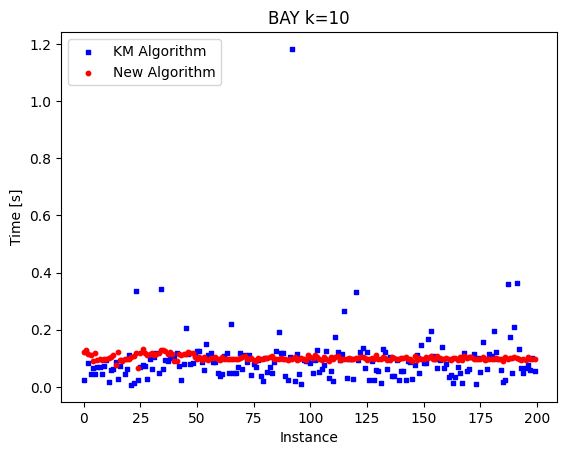

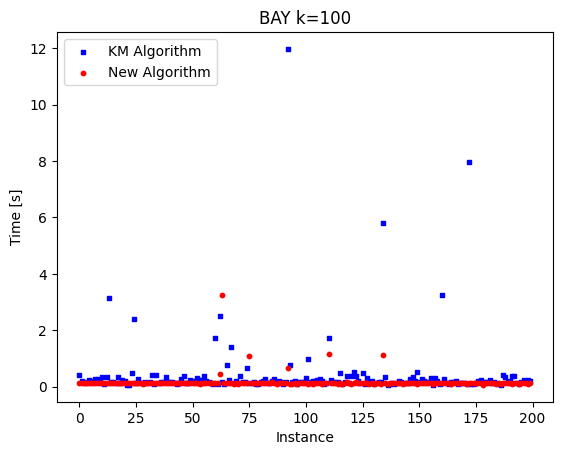

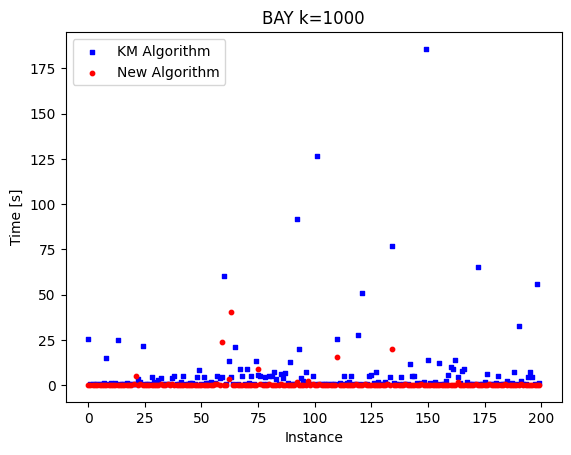

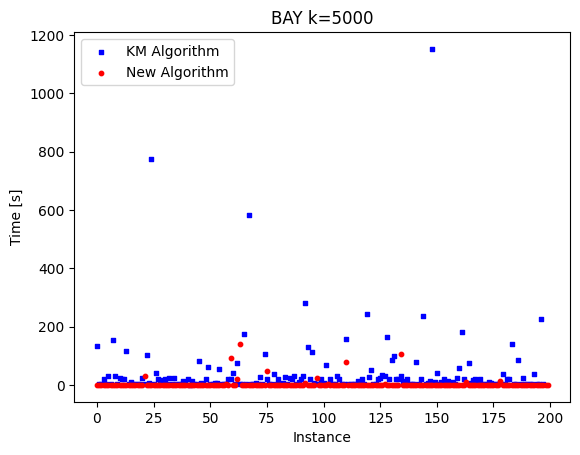

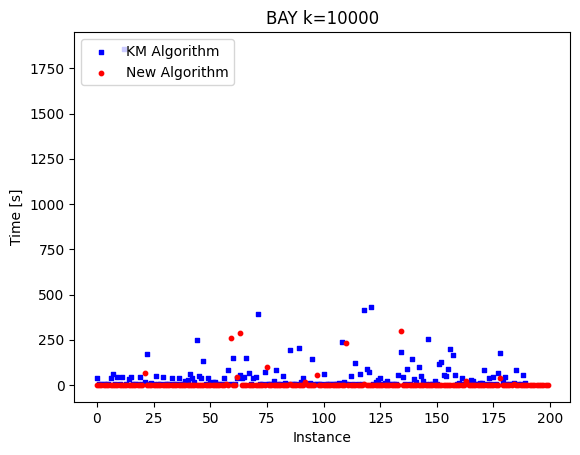

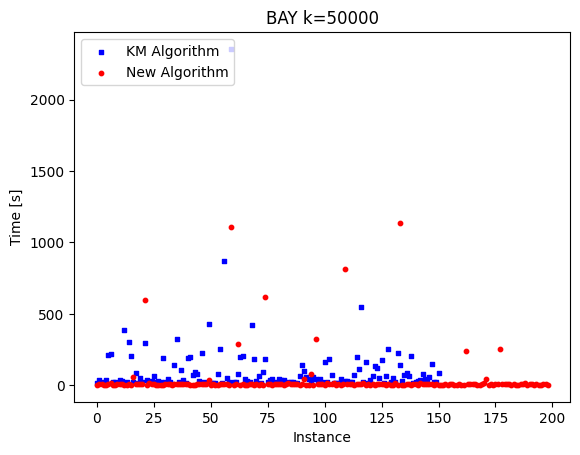

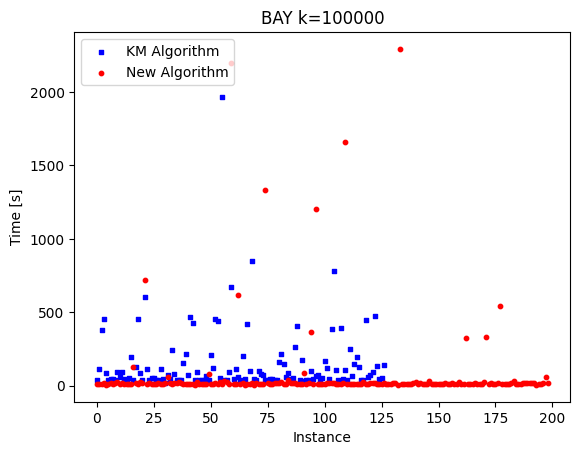

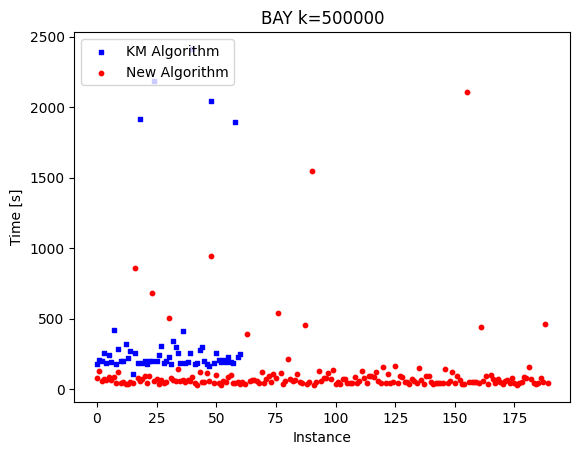

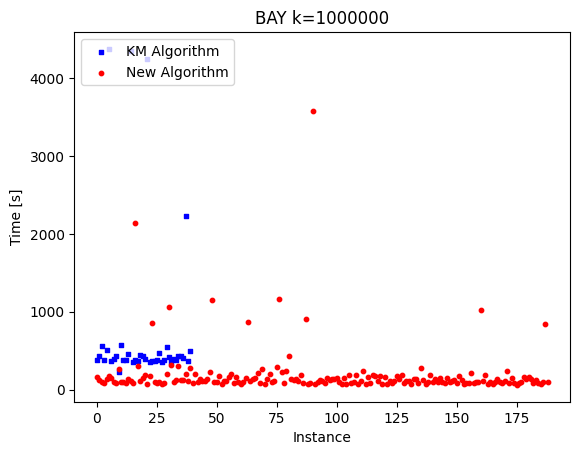

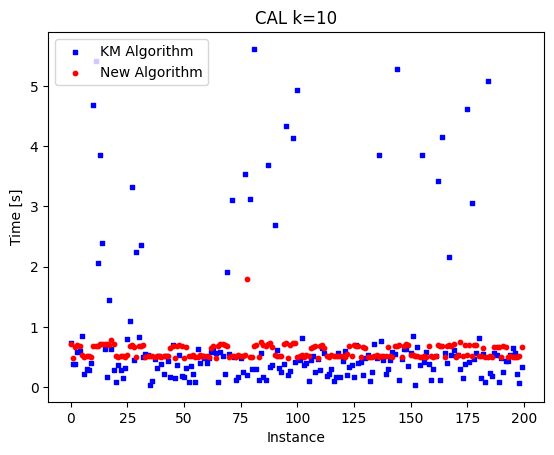

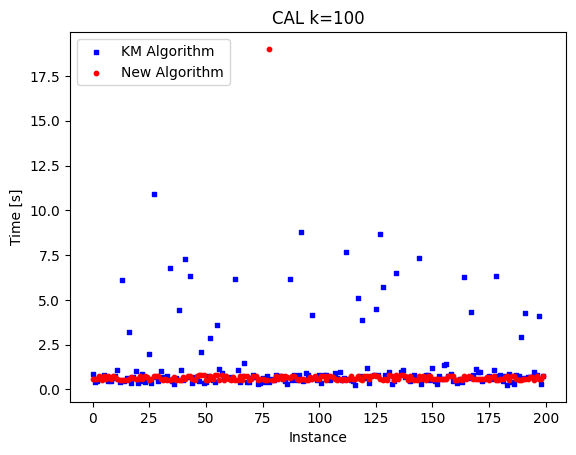

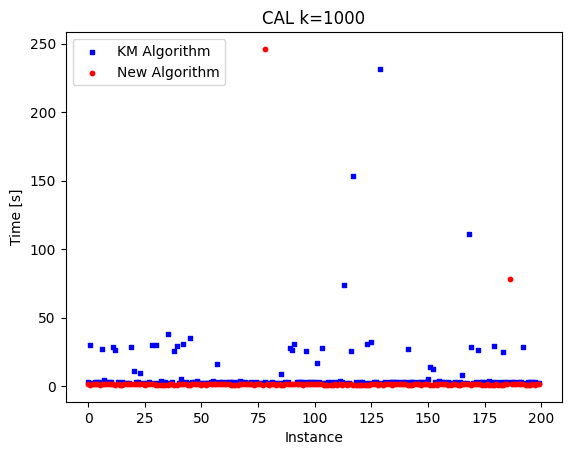

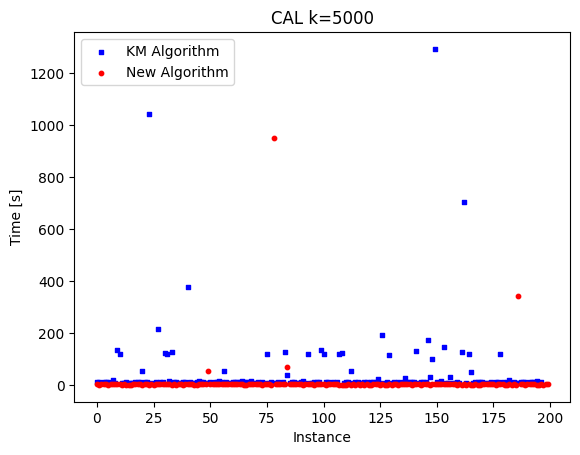

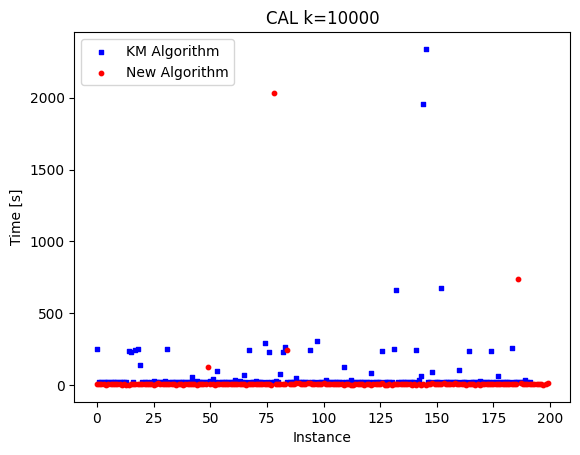

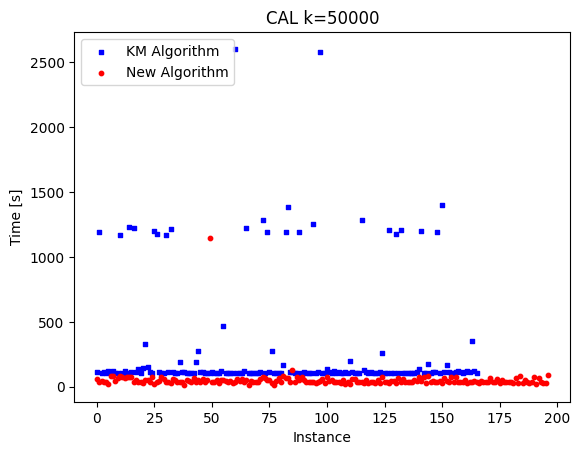

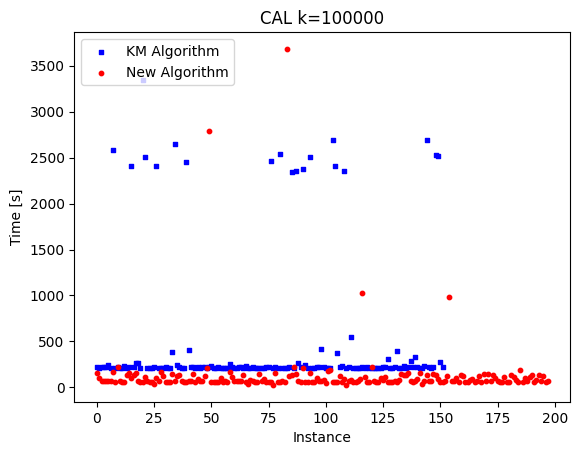

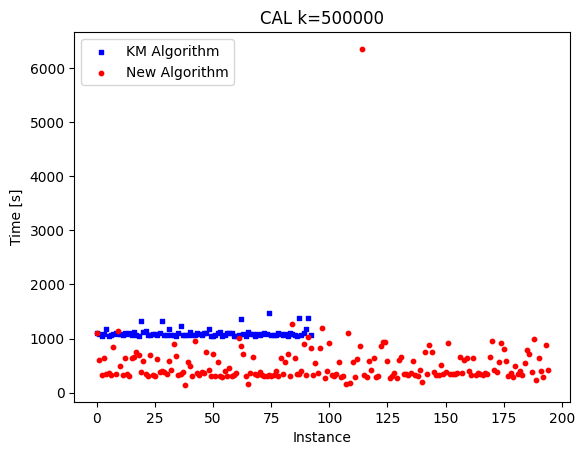

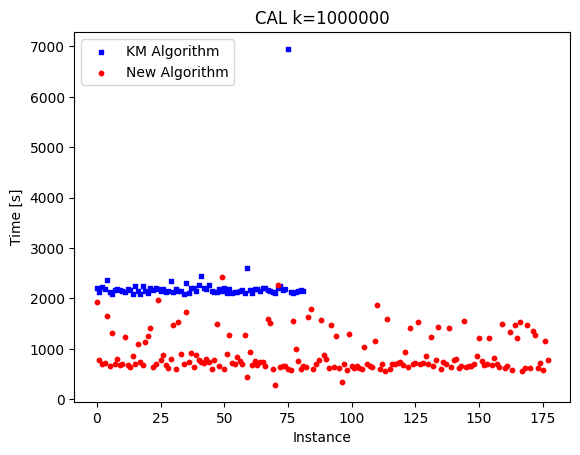

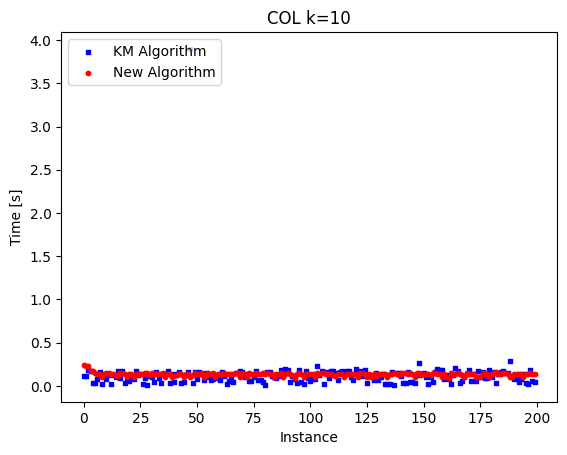

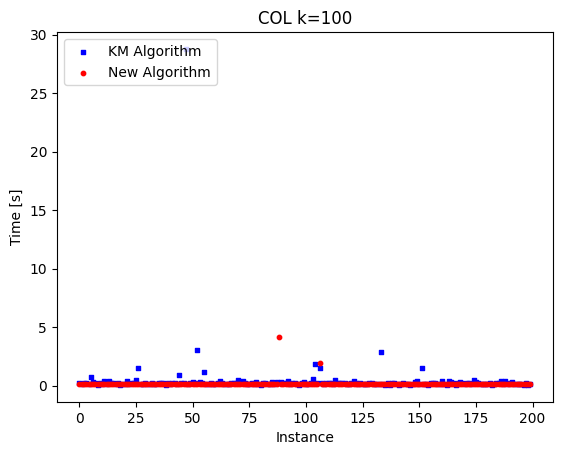

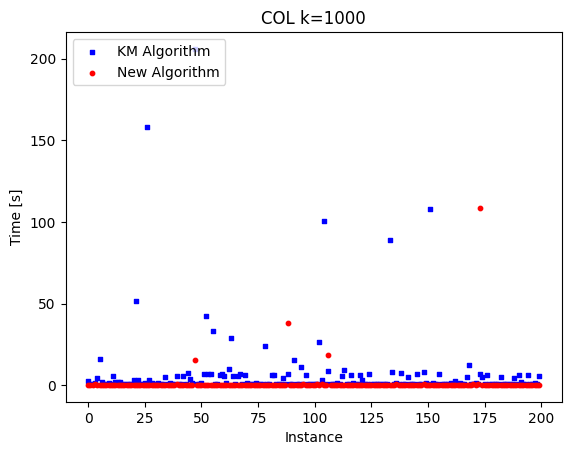

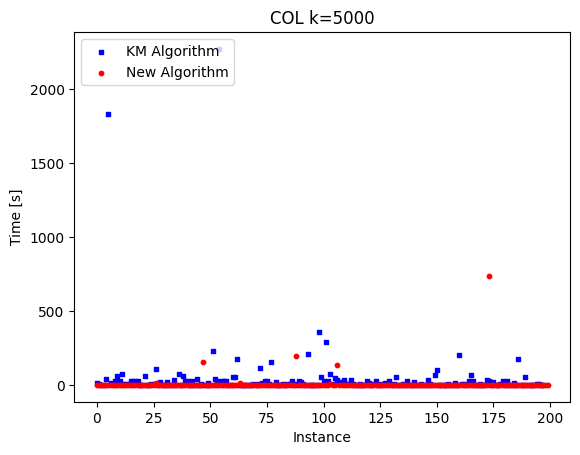

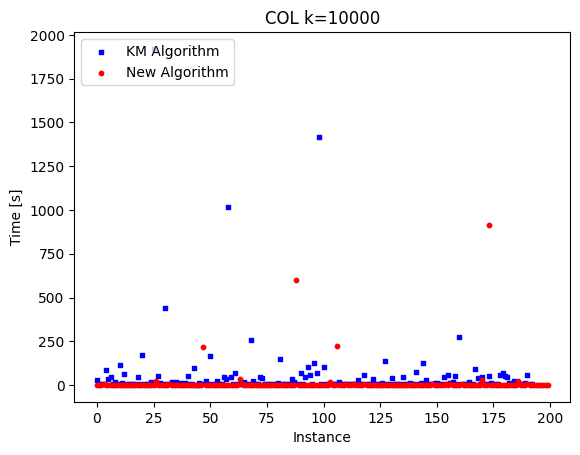

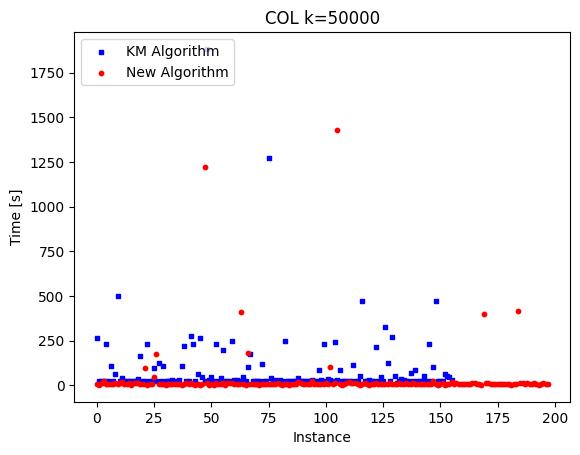

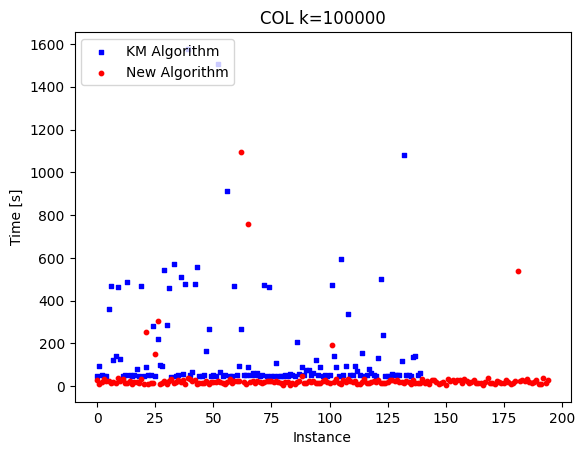

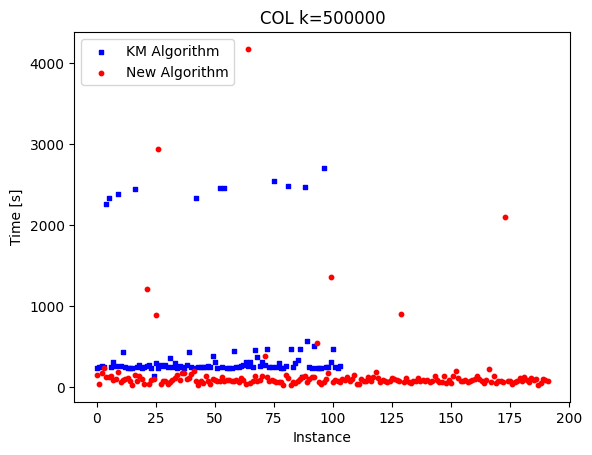

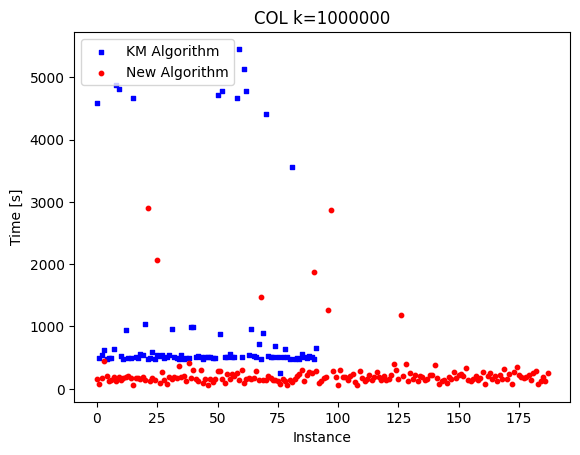

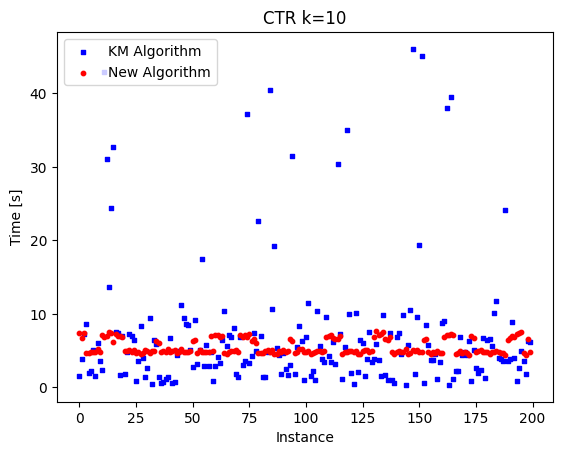

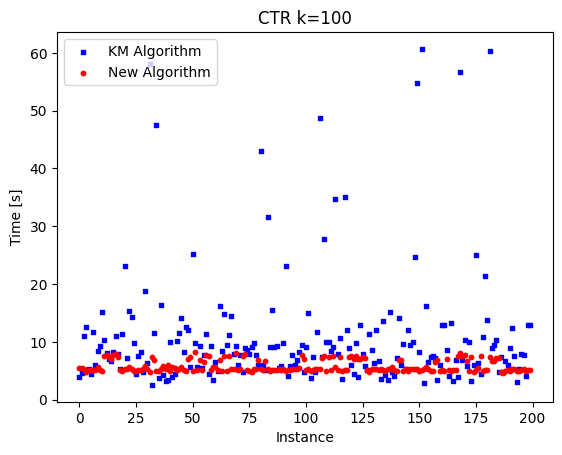

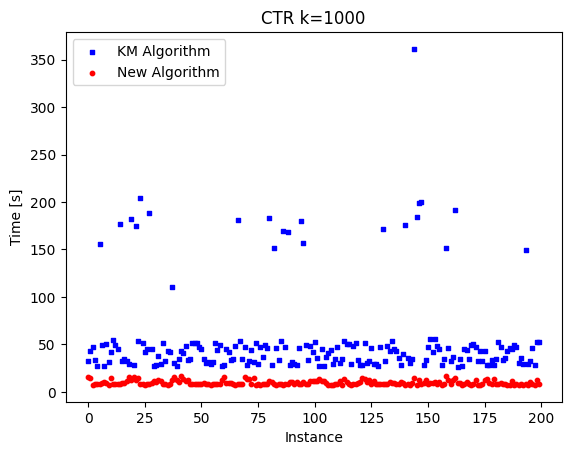

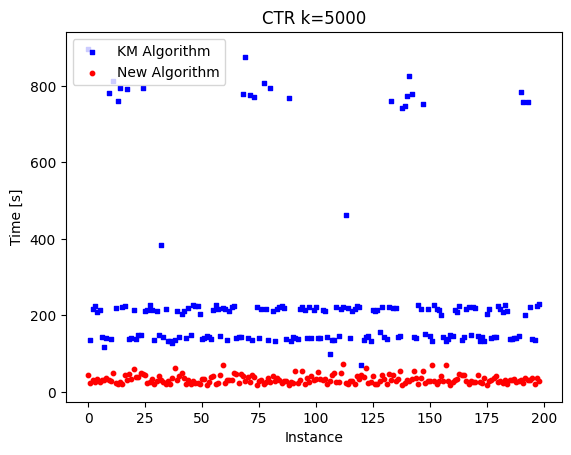

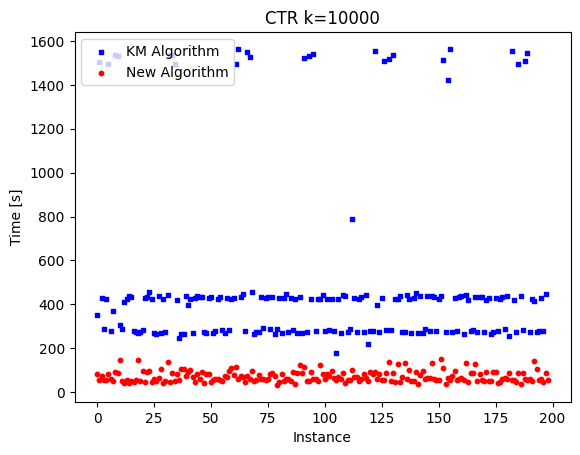

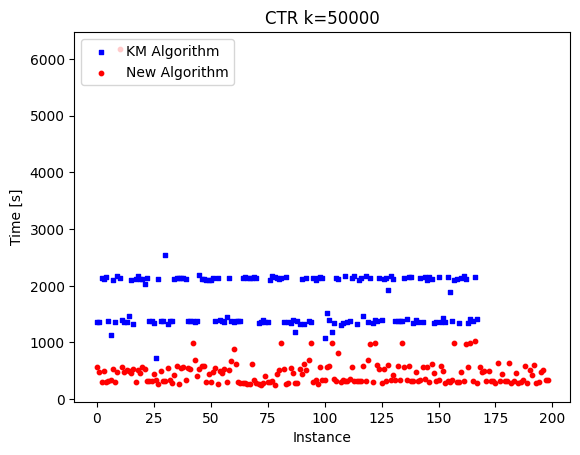

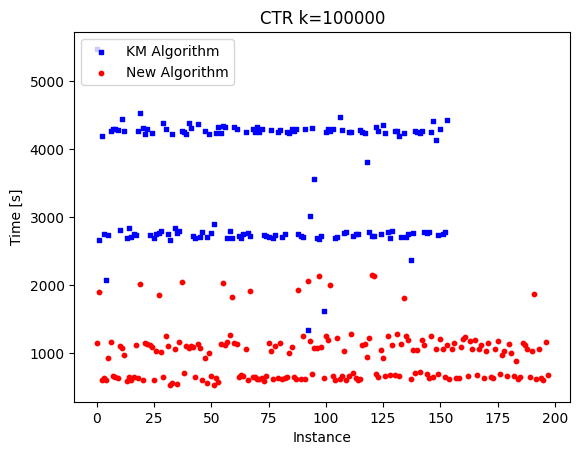

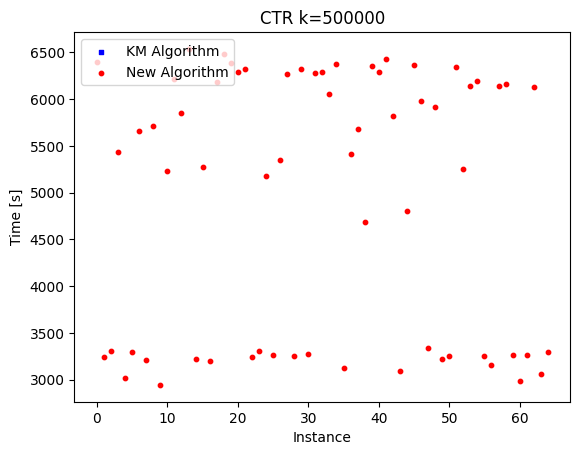

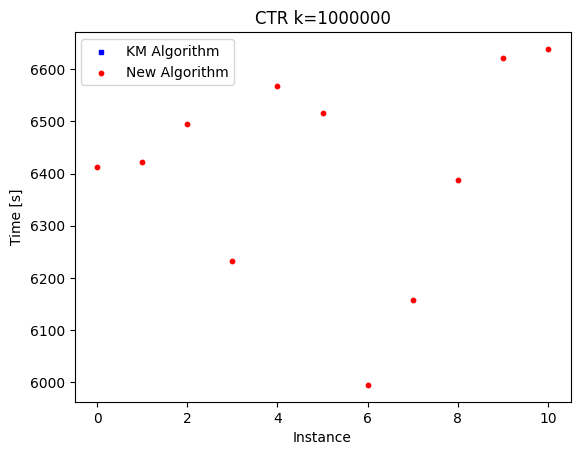

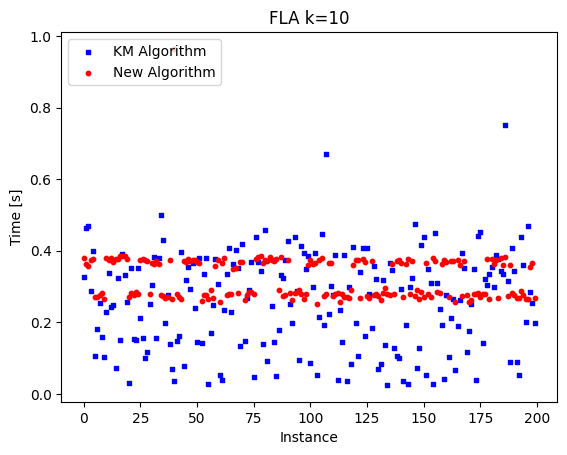

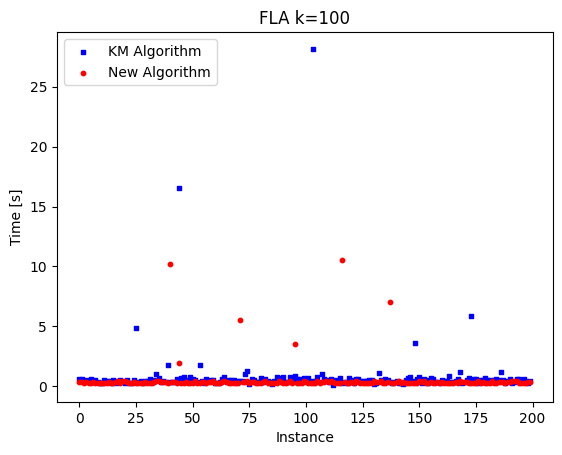

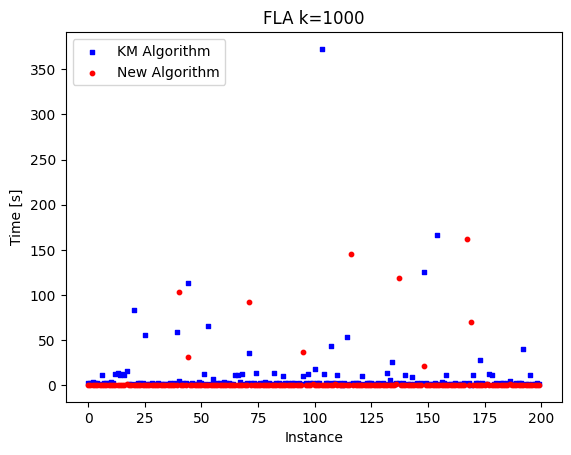

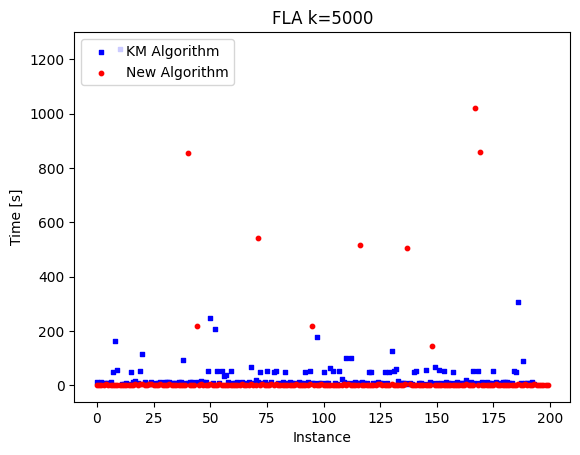

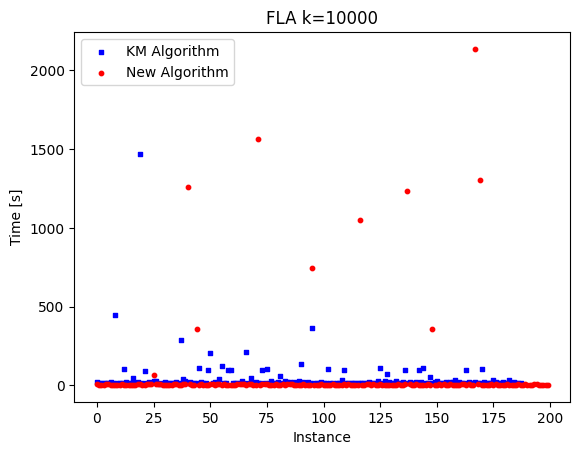

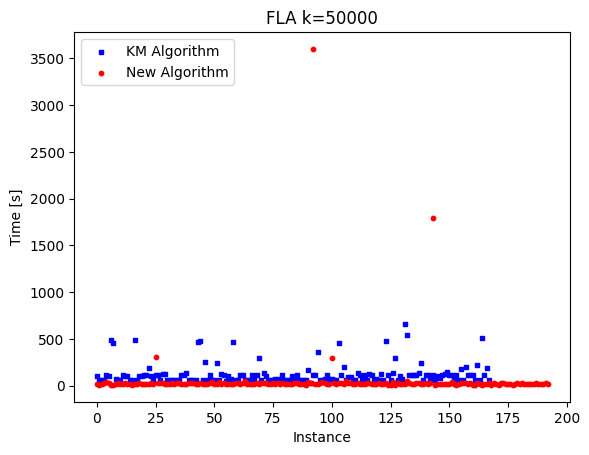

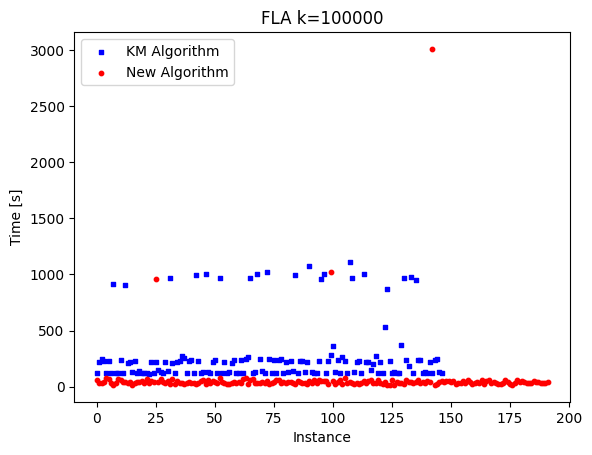

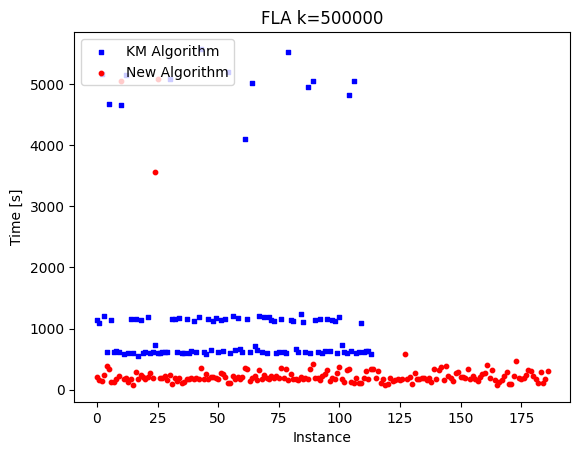

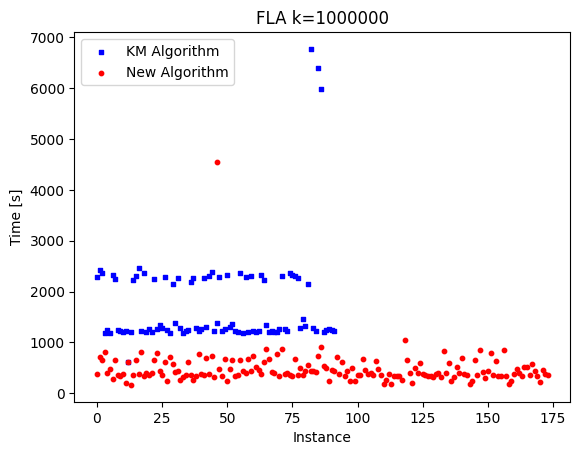

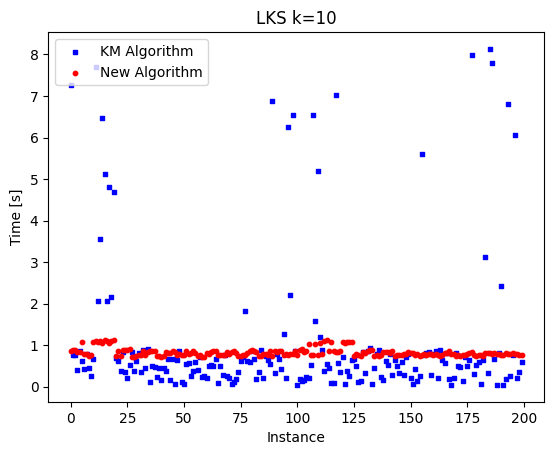

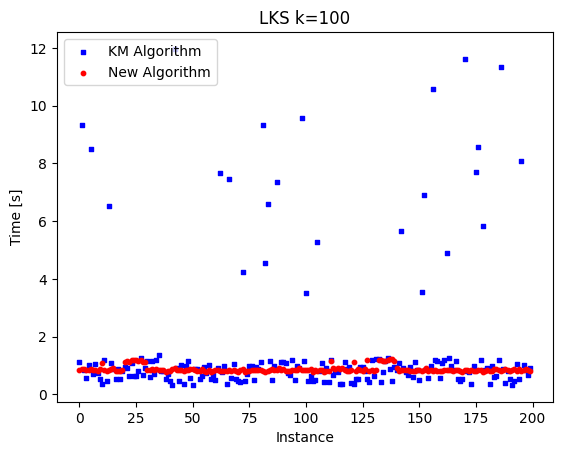

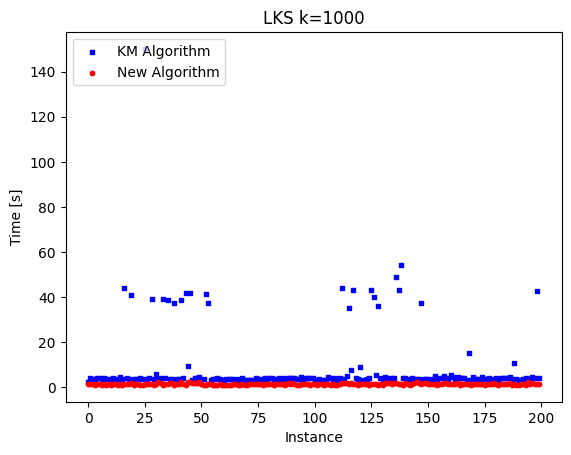

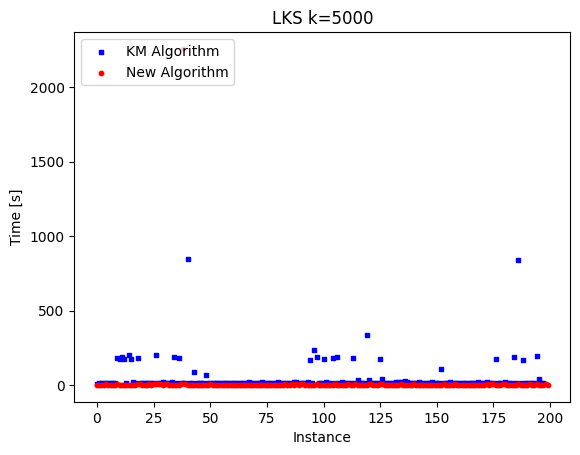

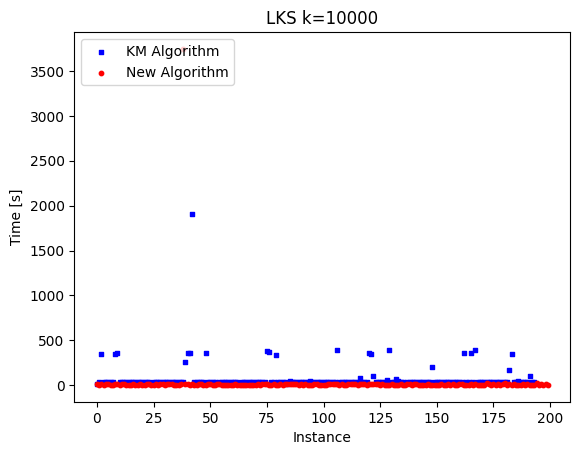

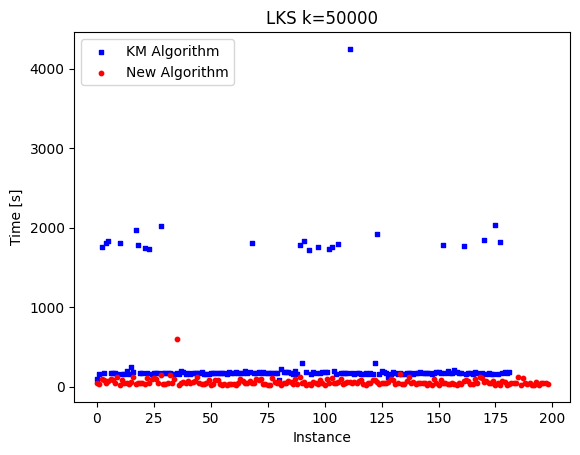

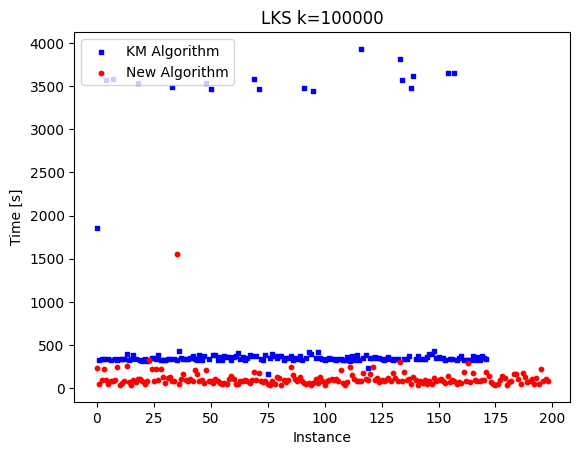

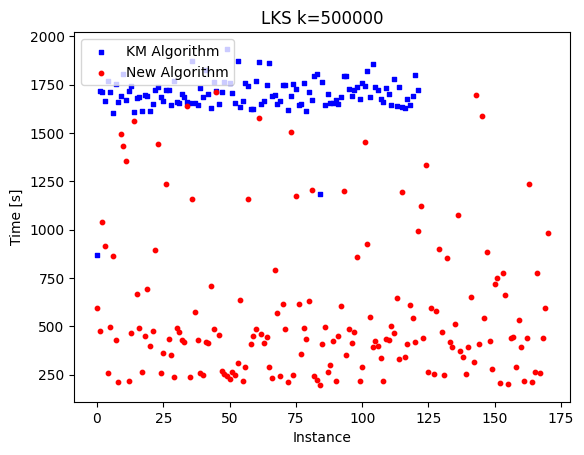

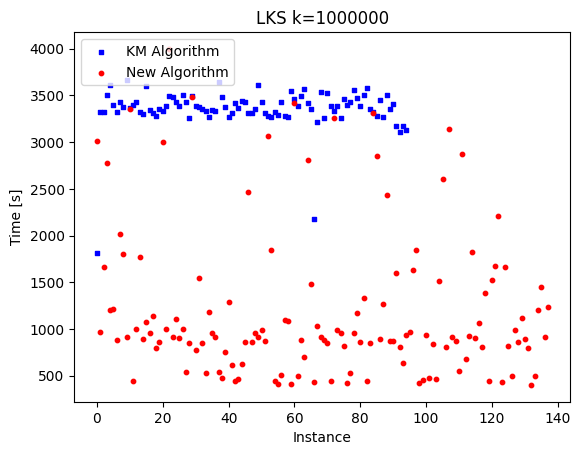

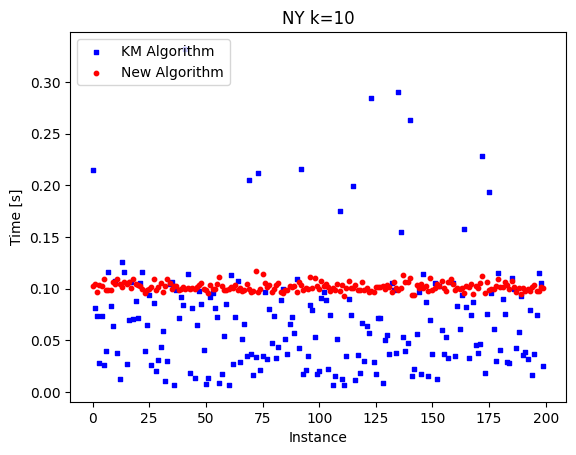

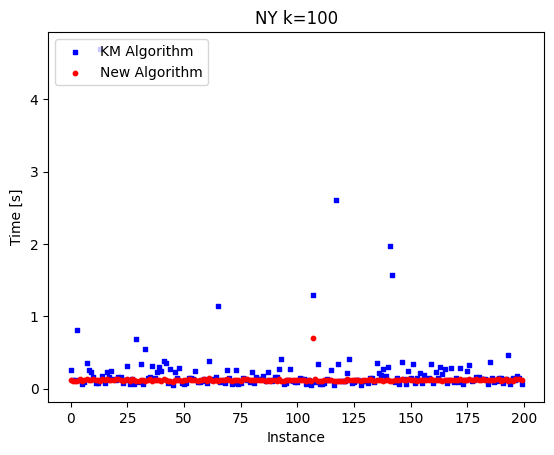

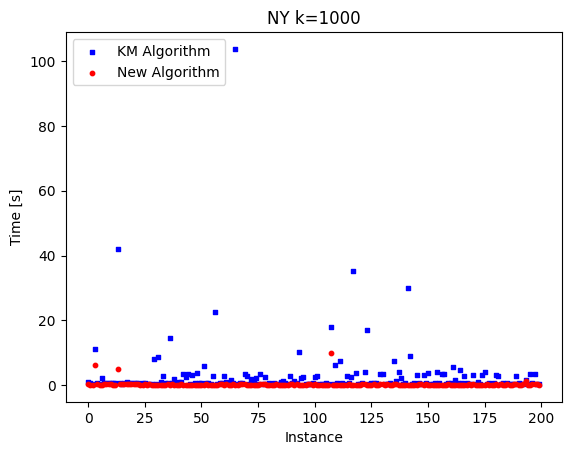

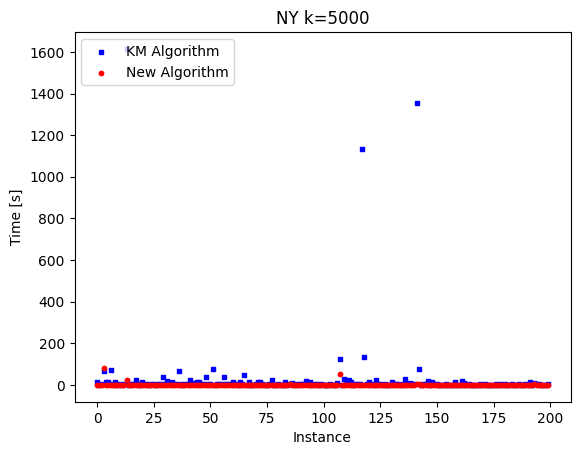

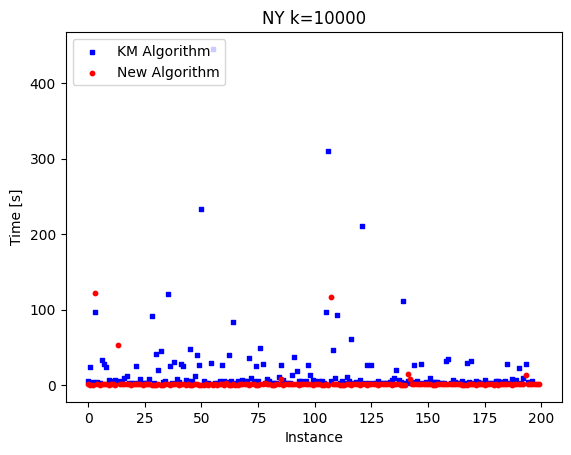

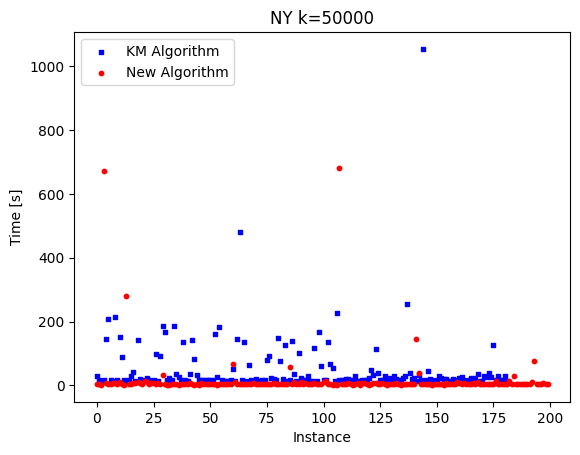

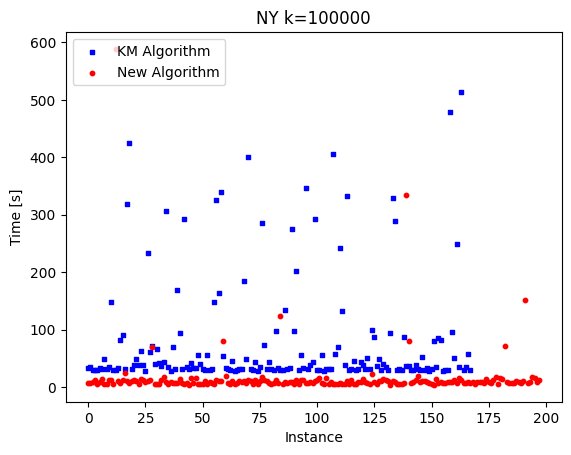

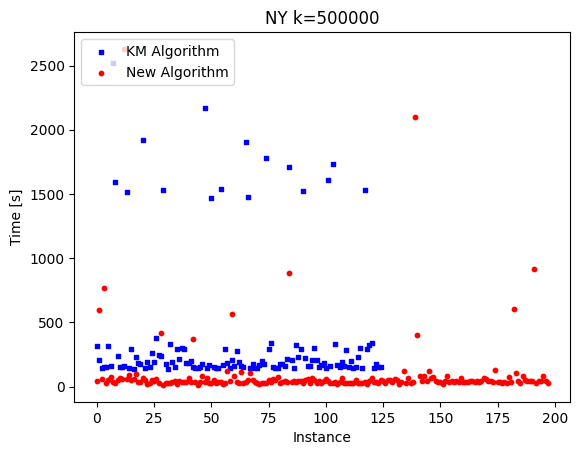

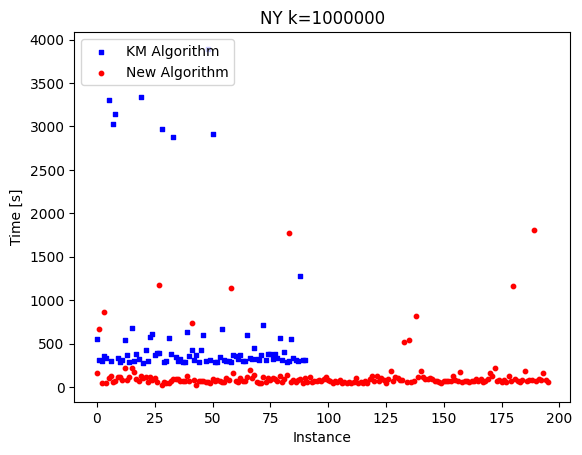

In [12]:
import matplotlib.pyplot as plt

for graphName, graphDf in mergedDf.groupby(by='GRAPH'):
    name = graphName.split('.')[-2]
    for pathsCount, pathsCountDf in graphDf.groupby(by='K'):
        kurz = list(pathsCountDf[pathsCountDf['SOLUTIONS_kurz'].notna()]['TIME_kurz'])
        xKurz = list(range(len(kurz)))
        newAlgo = list(pathsCountDf[pathsCountDf['SOLUTIONS_na'].notna()]['TIME_na'])
        xNewAlgo = list(range(len(newAlgo)))
        fig = plt.figure()
        fig.patch.set_alpha(0.0)
        ax1 = fig.add_subplot(111)

        ax1.scatter(xKurz, kurz, s=10, c='b', marker="s", label='KM Algorithm')
        ax1.scatter(xNewAlgo, newAlgo, s=10, c='r', marker="o", label='New Algorithm')
        plt.ylabel('Time [s]')
        plt.xlabel('Instance')
        plt.legend(loc='upper left')
        plt.title(f'{name} k={pathsCount}')
        plt.savefig(f'./plots/road-{name}-{pathsCount}.svg')
        #plt.show()